### TASK 01 :

In [101]:
import numpy as np
import pandas as pd
import matplotlib as mbl
import matplotlib.pyplot as plt

In [102]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df=pd.read_csv(url)

#### 1. Create a pie chart presenting the male/female proportion

male      843
female    466
Name: sex, dtype: int64


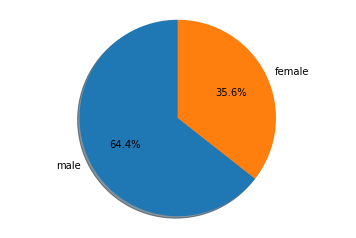

In [103]:
distri=df['sex'].value_counts()
print(distri)
i=distri.index

fig1, ax1 = plt.subplots()
ax1.pie(distri, labels=i, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [104]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [105]:
fare1 = df[['fare']]
age1= df[['age']]
print(fare1[:5])
print(age1[:5])

       fare
0  211.3375
1  151.5500
2  151.5500
3  151.5500
4  151.5500
       age
0  29.0000
1   0.9167
2   2.0000
3  30.0000
4  25.0000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


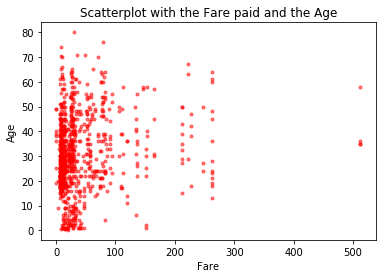

In [106]:
colors = (1,0,0)
area = np.pi*3
 
# Plot

plt.scatter(fare1, age1, s=area, c=colors, alpha=0.5)
plt.colors = {'male':'blue', 'female':'orange'}
plt.title('Scatterplot with the Fare paid and the Age')
plt.xlabel('Fare')
plt.ylabel('Age')

plt.show()

#### Task 2:


#### It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [107]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays':  [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


##### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column)

In [108]:
df.loc[df['FlightNumber'].isna(),'FlightNumber'] = df.loc[df[df['FlightNumber'].isna()].index-1,'FlightNumber'].astype(int)+10
print(df.loc[df['FlightNumber'].isna(),'FlightNumber'])
print(df.loc[df[df['FlightNumber'].isna()].index-1,'FlightNumber'].astype(int)+10)

1   NaN
3   NaN
Name: FlightNumber, dtype: float64
0    10055
2    10075
Name: FlightNumber, dtype: int32


##### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame

In [109]:
new=df["From_To"].str.split("_", n = 1, expand = True)
new.columns = ['From', 'To']
df_temp=new
df_temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


##### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become"London".)

In [110]:
new['From']=df_temp.From.str.title()
new['To']=df_temp.To.str.title()
new

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


##### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions

In [111]:
df.drop(columns =["From_To"], inplace = True)

In [112]:
df['From']=new['From']
df['To']=new['To']
new.head()

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


##### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,delay_2, etc. and replace the unwanted RecentDelays column in df with delays.


In [113]:
print(df)
tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['Delay_1', 'Delay_2', 'Delay_3']
df = df.drop('RecentDelays', 1)
df.insert(3, "Delay_1", tDelay['Delay_1'])
df.insert(4, "Delay_2", tDelay['Delay_2'])
df.insert(5, "Delay_3", tDelay['Delay_3'])
df

   FlightNumber  RecentDelays              Airline      From         To
0       10045.0      [23, 47]               KLM(!)    London      Paris
1           NaN            []    <Air France> (12)    Madrid      Milan
2       10065.0  [24, 43, 87]  (British Airways. )    London  Stockholm
3           NaN          [13]       12. Air France  Budapest      Paris
4       10085.0      [67, 32]          "Swiss Air"  Brussels     London


,FlightNumber,Airline,From,Delay_1,Delay_2,Delay_3,To
0,10045.0,KLM(!),London,23.0,47.0,NaN,Paris
1,NaN,<Air France> (12),Madrid,NaN,NaN,NaN,Milan
2,10065.0,(British Airways. ),London,24.0,43.0,87.0,Stockholm
3,NaN,12. Air France,Budapest,13.0,NaN,NaN,Paris
4,10085.0,"""Swiss Air""",Brussels,67.0,32.0,NaN,London
